# Stochastic Gradient Descent:

It is an other type of the Gradient Descent algorithm that is used for Optimizing Machine Learning Models Iteratively. It addresses the computational inefficiency of Batch Gradient Descent methods when dealing with large datasets.

In SGD, instead of using the entire dataset for each iteration, only a single random example is selected to calculate the gradient and update the model parameters. This random selection introduces `randomness` into the optimization process, hence the term “**stochastic**” in Stochastic Gradient Descent


### Path taken by Stochastic Gradient Descent looks as follows –  

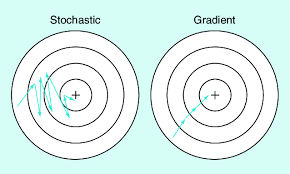

**Note:** SGD is noisier than Batch Gradient Descent, and often requiring more iterations to reach the minima due to its randomness. Despite this, it is computationally more efficient, making it a preferred choice in most scenarios over Batch Gradient Descent for optimizing learning algorithms.

## Advantages of Stochastic gradient descent:

In Stochastic gradient descent (SGD), learning happens on every example, and it consists of a few advantages over other gradient descent.

* **Memory Efficiency:**  It updates the parameters for each training example one at a time, it is memory-efficient and can easier to allocate large datasets in desired memory.
* **Speed:**  It is relatively fast to compute than Batch Gradient Descent and Mini-Batch Gradient Descent, because it uses only one example to update the parameters..
* **Computationally Efficient:**  By using a single example, the computational cost per iteration is significantly reduced compared to Batch Gradient Descent methods that require processing the entire dataset.
* **Avoidance of Local Minima:**  Due to the noisy updates in SGD, it has the ability to escape from local minima and converges to a global minimum.

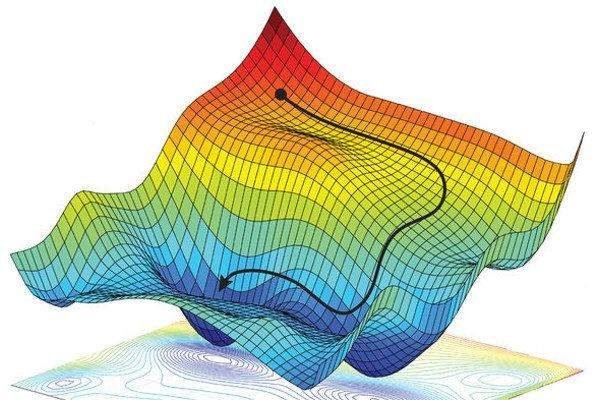


Let's proceed to build an Approximation Class that will assist us in determining the beta values (coefficients and intercept) using Stochastic Gradient Descent for our Multiple Linear Regression Model. I will use the Diabetes dataset to create our own GDRegressor and validate it against Sklearn's SGDRegressor.

## Importing Dataset

In this implementation I am using Diabetes Data of sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
(inputs, target) = load_diabetes(return_X_y = True) 

In [4]:
print('inputs.shape:' , inputs.shape)
print('target.shape:' ,target.shape)

inputs.shape: (442, 10)
target.shape: (442,)


## Splitting data into train and test datasets

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_inputs, test_inputs, train_target, test_target = train_test_split(inputs, target, test_size = 0.2 , random_state = 42)

In [7]:
print('train_inputs:' ,train_inputs)
print("\n")
print('train_.shape:', train_inputs.shape)

train_inputs: [[ 0.07076875  0.05068012  0.01211685 ...  0.03430886  0.02736405
  -0.0010777 ]
 [-0.00914709  0.05068012 -0.01806189 ...  0.07120998  0.00027248
   0.01963284]
 [ 0.00538306 -0.04464164  0.04984027 ... -0.00259226  0.01703607
  -0.01350402]
 ...
 [ 0.03081083 -0.04464164 -0.02021751 ... -0.03949338 -0.01090325
  -0.0010777 ]
 [-0.01277963 -0.04464164 -0.02345095 ... -0.00259226 -0.03845972
  -0.03835666]
 [-0.09269548 -0.04464164  0.02828403 ... -0.03949338 -0.00514219
  -0.0010777 ]]


train_.shape: (353, 10)


Note: **Data Preprocessing**: Ensure that the data preprocessing steps, such as normalization or standardization, must be perform. Discrepancies in data processing can impact model convergence.

Here, I'm not applying DataStandardization because the dataset is already in Similar Range of all the axis.

Since, Stochastic Gradient Descent requires the value of Learning Rate and Epochs. I am first applying the sklearn's StochasticGradientDescent for better implementation of our model.

In [8]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

In [10]:
reg = SGDRegressor(max_iter=500,learning_rate='constant',eta0=0.01)
reg.fit(train_inputs, train_target)

SGDRegressor(learning_rate='constant', max_iter=500)

In [12]:
y_pred = reg.predict(test_inputs)

In [14]:
print("SGDRegressor Coefficients:", reg.coef_)
print("\n")
print("SGDRegressor Intercept:", reg.intercept_)

SGDRegressor Coefficients: [  53.00897234 -126.73396481  412.23622602  277.2729091   -23.54477637
  -66.58596434 -195.90104992  147.23460275  315.64136954  143.74333886]


SGDRegressor Intercept: [148.50941591]


In [15]:
r2_score(test_target,y_pred)

0.4508313570919332

## Building our own Stochastic Gradient Descent Class

In [16]:
import numpy as np

I am using the first derivative of Mean Squared Error (MSE) for finding convergence in Stochastic Gradient Descent (SGD) algorithm. The first derivative, often referred to as the gradient, indicates the direction and magnitude of the steepest ascent of the cost function. By updating the model parameters (coefficients and intercept) in the opposite direction of the gradient, aim to minimize the cost function.

## Stochastic Gradient Descent Algorithm 

**1. Initialize Parameters**: Randomly initialize the parameters of the model. Determine the number of iterations(epochs) and the learning rate for updating the parameters.

**2. Stochastic Gradient Descent Loop**: Repeat the following steps until the model converges or reaches the maximum number of iterations: 
       
       a. Iterate over each randomly selected training example from training dataset to introduce randomness. 

       b. Compute the gradient of the cost function with respect to the model parameters using the current training example. 

       c. Update the model parameters by taking a step in the direction of the negative gradient, as per the learning rate.                  

       d. Evaluate the convergence criteria, such as the difference in the cost function between iterations of the gradient.

**3. Return Optimized Parameters:** Once the convergence criteria are met or the maximum number of iterations is reached, return the optimized model parameters.

In [39]:
class StochasticGDRegressor():
    
    def __init__(self, learning_rate = 0.01, epochs = 200):
        self.coeff = None
        self.intcpt = None
        self.learning_rate = learning_rate
        self.epochs = epochs

    
    # Creating 'fit' Function
    def fit(self, train_inputs, train_target):
        
        # In Multiple Linear Regression, it is advisable to choose the starting point of intercept = 0 and coeffients = 1
        
        # Staring with initializing intercept = 0  
        self.intcpt = 0
        
        # Staring with initializing coefficients = 1
        self.coeff = np.ones(train_inputs.shape[1]) # Using train_inputs.shape[1] for the number of features
        
        # Starting iteration loop 
        for i in range(self.epochs):
            for j in range(train_inputs.shape[0]): 
                
                # Fetching the index randomly
                idx = np.random.randint(0, train_inputs.shape[0])
            
                # Calculating the derivative of intercept values
                y_hat = np.dot(train_inputs[idx], self.coeff) + self.intcpt

                intercept_derivative = -2 * np.mean(train_target[idx] - y_hat)
                                
                # Updating all the intercept values
                self.intcpt = self.intcpt - (self.learning_rate * intercept_derivative)

                # Calculating the derivative of intercept values
                coeff_derivative = -2 * np.dot((train_target[idx] - y_hat), train_inputs[idx])

                # Updating all the intercept values
                self.coeff = self.coeff - (self.learning_rate * coeff_derivative)

    @property
    def coefficients(self):
        if self.coeff is not None:
            return self.coeff
        else:
            print("Model not fitted yet.")
            return None

    @property
    def intercept(self):
        if self.intcpt is not None:
            return self.intcpt
        else:
            print("Model not fitted yet.")
            return None
        
        
    # Creating 'predict' Function
    def predict(self, test_inputs):
        return np.dot(test_inputs, self.coeff) + self.intcpt
    
    
    # R2 - scoring for Metric Evaluation 
    def score(self, test_inputs, test_target):
        predictions = self.predict(test_inputs)
        r2 = r2_score(test_target, predictions)
        return r2

In [40]:
sgd = StochasticGDRegressor(learning_rate=0.01,epochs=500)

In [41]:
sgd.fit(train_inputs, train_target)

In [42]:
print("StochasticGDRegressor Coefficients:", sgd.coefficients)
print("\n")
print("StochasticGDRegressor Intercept:", sgd.intercept)

StochasticGDRegressor Coefficients: [  43.00297577 -237.60014313  562.78410347  333.84767943 -125.88091609
 -106.29975329 -208.01352908  153.03909436  423.57095708   55.00091245]


StochasticGDRegressor Intercept: 147.41704853952155


Additionally, using the R2 score as a regression metric is a good choice for evaluating the performance of model. R2 measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R2 score indicates better predictive performance.

In [43]:
r2 = sgd.score(test_inputs, test_target)

print(f"R2 score on test data: {r2}")

R2 score on test data: 0.44582679448963036


The slight difference in performance between sklearn's SGDRegressor model and my custom Stochastic Gradient Descent (SGD) Class implementation can be attributed to several factors:

**1. Hyperparameter Tuning:** The performance of SGDRegressor in sklearn may be influenced by default hyperparameter settings, optimized for specific large datasets.

**2. Random Initialization:** My custom SGD implementation employs a random index for gradient descent updates, introducing randomness that can lead to different convergence paths and variations in final model parameters.

**3. Convergence Criteria:** Differences in the number of epochs and convergence criteria could contribute to performance variations between the two implementations.

**4. Learning Rate Schedule:** sklearn's SGDRegressor utilizes a default learning rate schedule, while I have not experimented with various learning rate schedules in my custom class.

**5. Regularization:** sklearn's SGDRegressor may include regularization terms by default, whereas my custom class does not currently implement any form of regularization.

By systematically evaluating these factors, you can identify the specific reasons behind the performance differences and refine your custom SGD implementation accordingly.

## Disadvantages of Stochastic Gradient Descent (SGD):

**1. Noisy Updates:** The updates in SGD are noisy with high variance, which can make the optimization process less stable and potentially leads to oscillations around the minimum.

**2. Slow Convergence:** Convergence in SGD may be slower as it updates parameters for each training example individually, requiring more iterations to reach the minima.

**3. Sensitivity to Learning Rate:** The choice of learning rate is crucial in SGD. A high rate may cause overshooting, while a low rate can result in slow convergence, impacting the algorithm's performance.

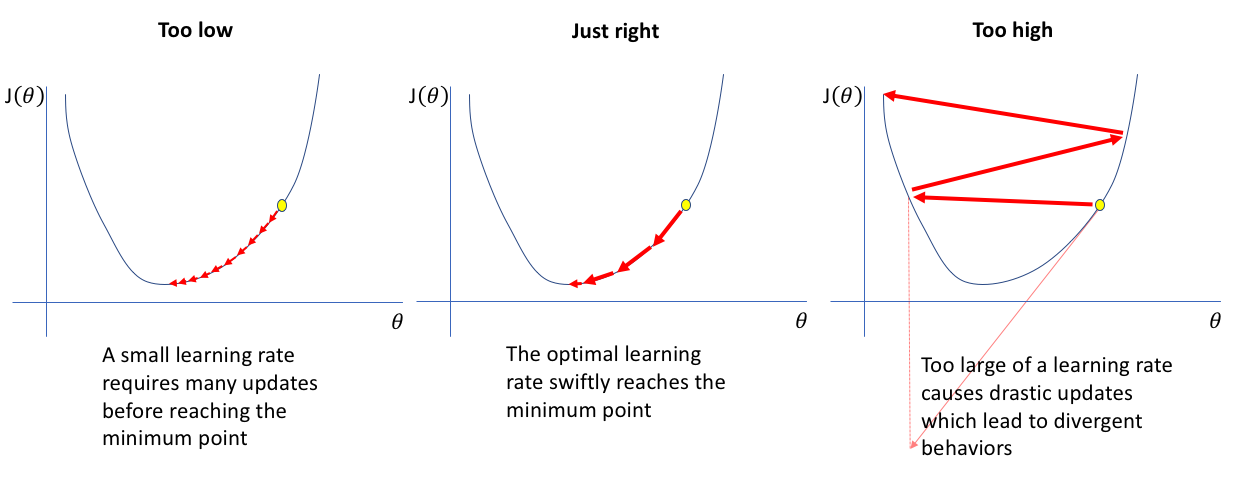


**4. Less Accuracy:** The noisy updates may prevent SGD from converging to the exact global minimum, yielding suboptimal solutions. Techniques like learning rate scheduling and momentum-based updates can help mitigate this issue.

## Difference between Batch Gradient Descent and Stochastic Gradient Descent

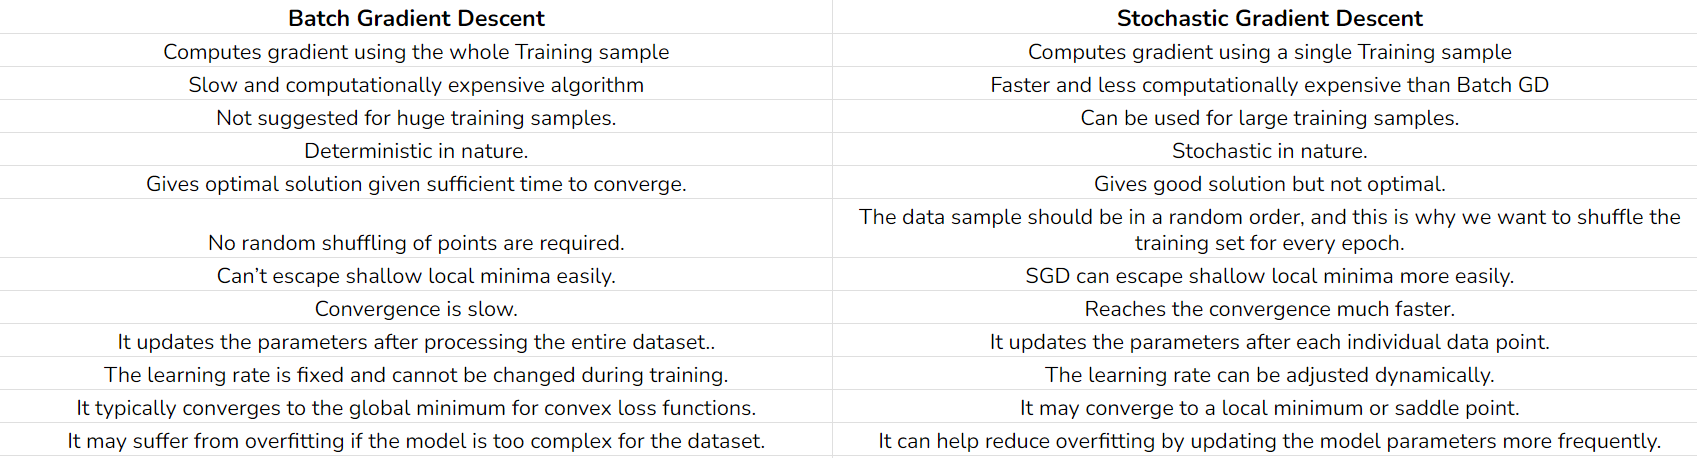

*Note: I have built a custom class to facilitate a better understanding of Stochastic Gradient Descent. Consequently, I would recommend utilizing the scikit-learn library for the development of your model.*

> Stay tuned for Polynomial Regression and Don't forget to **Star** this Github Repository for more such contents and consider sharing with others.